# MARKET BASKET ANALYSIS USING PYTHON 
#### Performed by : Tirth Chirayu Shah

### Start with importing the libraries required to perform the Market Basket Analysis(i.e. MBA) 
- we would be needing Numpy and Pandas for basic Data Cleaning and Data Preparation 
- we would be needing Matplotlib for visualizing the market distribution
- finally, we would be required to install "APRIORI" library to perform the MBA  (use ''' pip install apyori ''')

#### Let's import all these and get started with data cleaning

In [1]:
import numpy as np
import pandas as pd
from apyori import apriori
import matplotlib.pyplot as plt

#### Let's read the CSV file provided by : <l>https://github.com/Tirth-1999/Machine-Learning-with-R-datasets/blob/master/groceries.csv

In [2]:
marketdf = pd.read_csv("groceries_final.csv",header = None)
display(marketdf.head())
print(marketdf.shape)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(9835, 32)


#### As we can see that the dataset contains 9835 rows of transaction which include multiple items ;
- some items are less frequent 
- others are almost repeated in every transaction 

#### so we need to filter out transaction dataset, so that we can have some selection criteria such as *minimum length of transaction* and *more frequent items* etc

#### Solution: We created a function named "prune_Dataset"; to filter out insignificant data
#### parameters it takes:
- input_df : input dataset
- length_transaction : minimum length required
- total_sales_perc : to only consider those items which makes the given percentage of sales i.e. Market Share

#### Let's prune our dataset as well

In [3]:
def prune_Dataset(input_df= marketdf,length_trans = 2,total_sales_perc = 0.40):
    final_df2 = pd.DataFrame()
    for i in range(input_df.shape[0]):
        cnt = 0
        new_input = input_df.iloc[:][i:i+1]
        for j in range(new_input.shape[1]):
            if new_input.iloc[:,j].isnull().bool():
                if cnt <= length_trans:
                    break
                if cnt == 31:
                    final_df2 = final_df2.append(new_input,ignore_index=True)
            cnt+=1
    dict2 = dict()
    for i in range(final_df2.shape[1]):
        for j in range(final_df2.shape[0]):
            if final_df2[i][j] == "nan":
                continue
            elif final_df2[i][j] in list(dict2.keys()):
                dict2[final_df2[i][j]] += 1
            else:
                dict2[final_df2[i][j]] =1               
    total_purchase = sum(list(dict2.values()))
    market_sort = []
    for i,j in sorted(dict2.items(), key=lambda item: item[1], reverse = True):
        market_sort.append([i,j,float(int(j) * 100 /total_purchase)])
    new_market_df = pd.DataFrame(market_sort,columns=["item_name","item_count","item_perc"])
    new_market_df2 = new_market_df[new_market_df["item_name"].isnull() == False]
    new_total_purchase = sum(new_market_df2["item_count"])
    new_market_df3 = new_market_df2[["item_name","item_count"]]
    li = []
    for i in range(new_market_df3.shape[0]):
        li.append(float(new_market_df3["item_count"][i:i+1] / new_total_purchase))
    new_market_df3.insert(2,"item_perc",li,True)
    out_df = pd.DataFrame()
    for i in range(new_market_df3.shape[0]):
        if sum(new_market_df3["item_perc"].head(i)) > total_sales_perc:
            out_df = new_market_df3.head(i-1)
            break
    final_list = [final_df2,new_market_df2,new_market_df3,out_df]
    return final_list

#### Woah!! That function is cool right ?

#### it provides us a output dataset which matches our filtering criteria ; so lets see what we have 

In [43]:
final_market_list = prune_Dataset()
final_item_df = final_market_list[0]
display(final_item_df.head(20))

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,whole milk,butter,yogurt,rice,abrasive cleaner,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,tropical fruit,other vegetables,white bread,bottled water,chocolate,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,citrus fruit,tropical fruit,whole milk,butter,curd,yogurt,flour,bottled water,dishes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,frankfurter,rolls/buns,soda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,butter,sugar,fruit/vegetable juice,newspapers,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
final_market_df = final_market_list[1]
final_market_df_without_null = final_market_list[2]
output_df = final_market_list[3]
display(final_market_df.head())
display(final_market_df_without_null.head(20))
display(output_df.head(20))

,item_name,item_count,item_perc
1,whole milk,2186,1.132502
2,other vegetables,1727,0.894707
3,rolls/buns,1466,0.759491
4,soda,1340,0.694214
5,yogurt,1229,0.636708


,item_name,item_count,item_perc
1,whole milk,2186,0.057693
2,other vegetables,1727,0.045579
3,rolls/buns,1466,0.038691
4,soda,1340,0.035366
5,yogurt,1229,0.032436
6,root vegetables,1005,0.026524
7,tropical fruit,946,0.024967
8,bottled water,920,0.024281
9,shopping bags,869,0.022935
10,sausage,840,0.022169


,item_name,item_count,item_perc
1,whole milk,2186,0.057693
2,other vegetables,1727,0.045579
3,rolls/buns,1466,0.038691
4,soda,1340,0.035366
5,yogurt,1229,0.032436
6,root vegetables,1005,0.026524
7,tropical fruit,946,0.024967
8,bottled water,920,0.024281
9,shopping bags,869,0.022935
10,sausage,840,0.022169


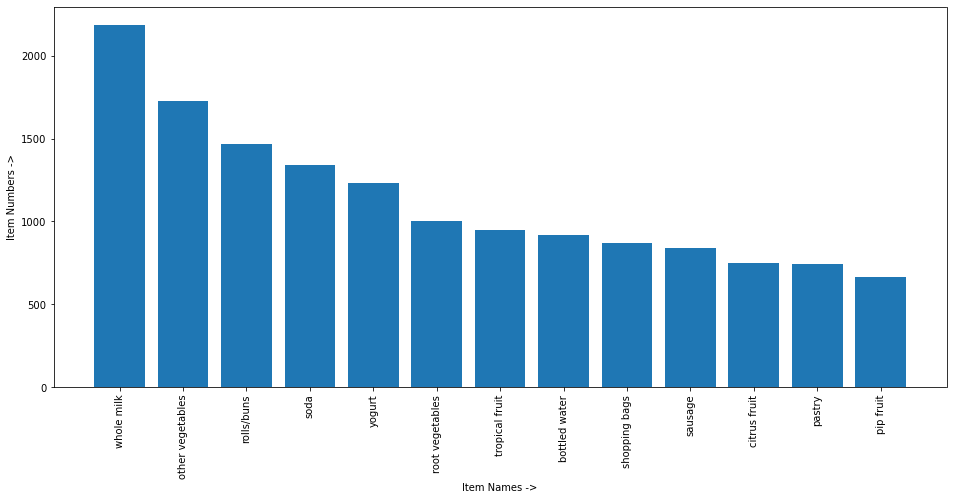

In [37]:
plt.figure(figsize=[16,7])
plt.bar(output_df["item_name"],output_df["item_count"])
plt.ylabel("Item Numbers ->")
plt.xlabel("Item Names ->")
plt.xticks(rotation = 90)
plt.show()

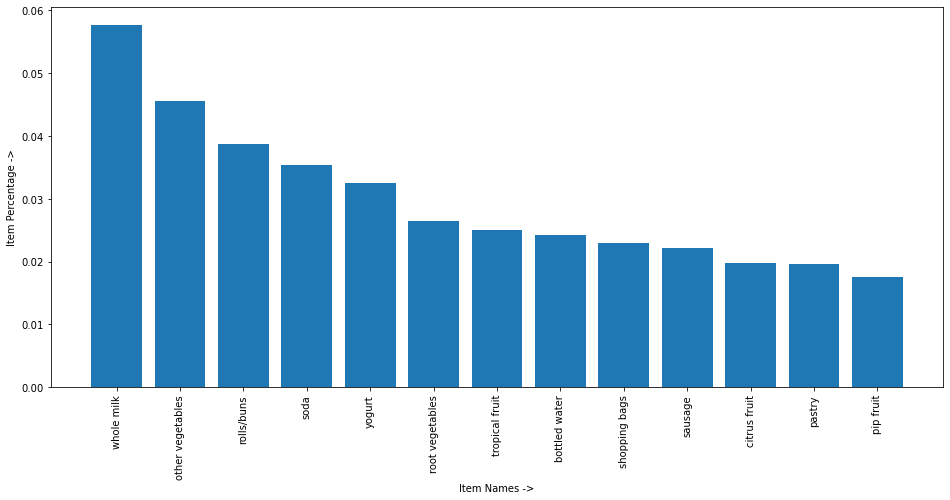

In [40]:
plt.figure(figsize=[16,7])
plt.bar(output_df["item_name"],output_df["item_perc"])
plt.ylabel("Item Percentage ->")
plt.xlabel("Item Names ->")
plt.xticks(rotation = 90)
plt.show()

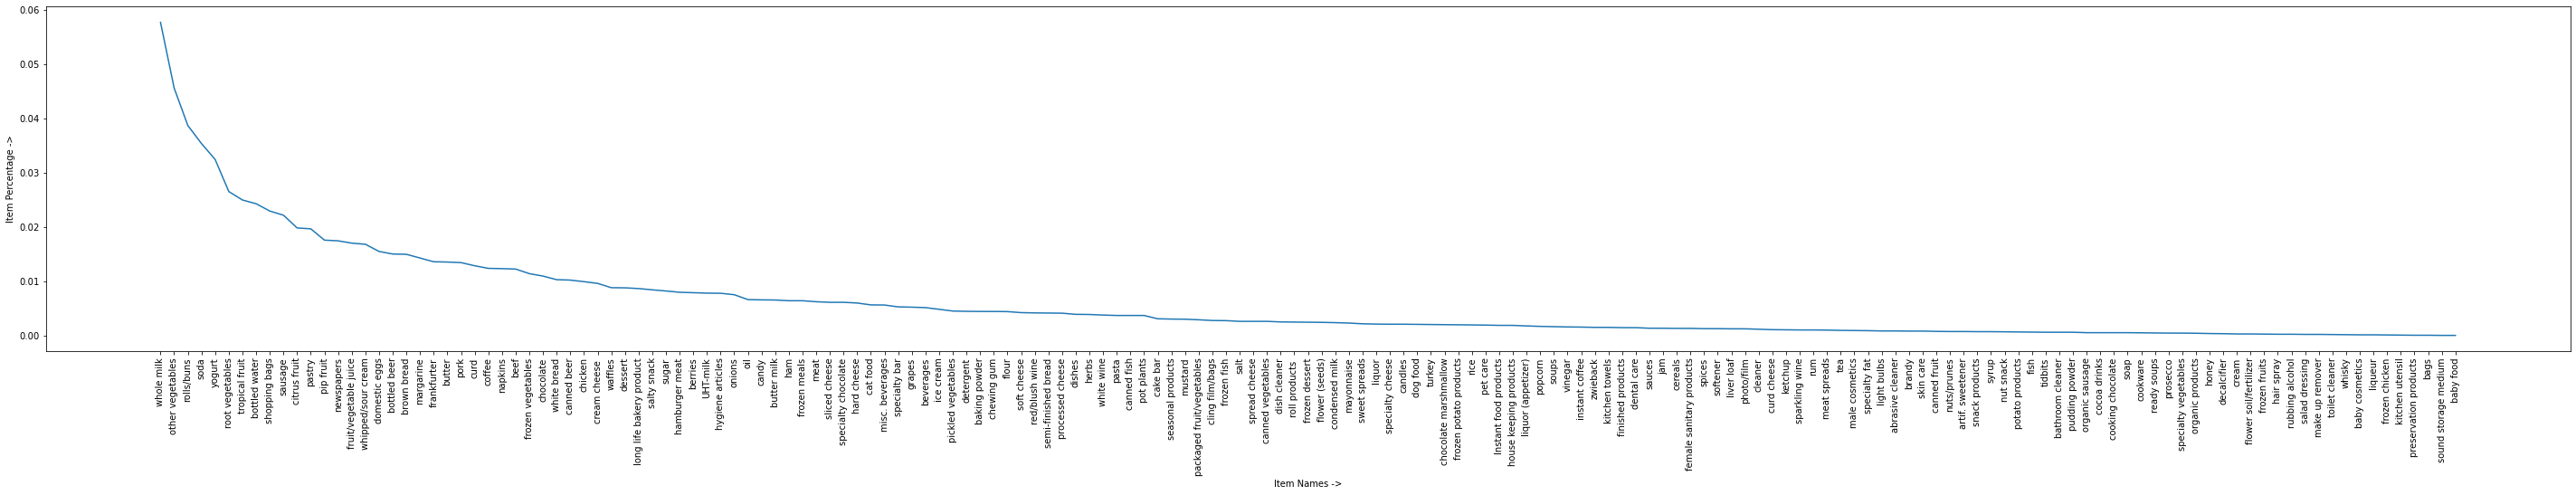

In [42]:
plt.figure(figsize=[50,7])
plt.plot(final_market_df_without_null["item_name"],final_market_df_without_null["item_perc"])
plt.ylabel("Item Percentage ->")
plt.xlabel("Item Names ->")
plt.xticks(rotation = 90)
plt.show()

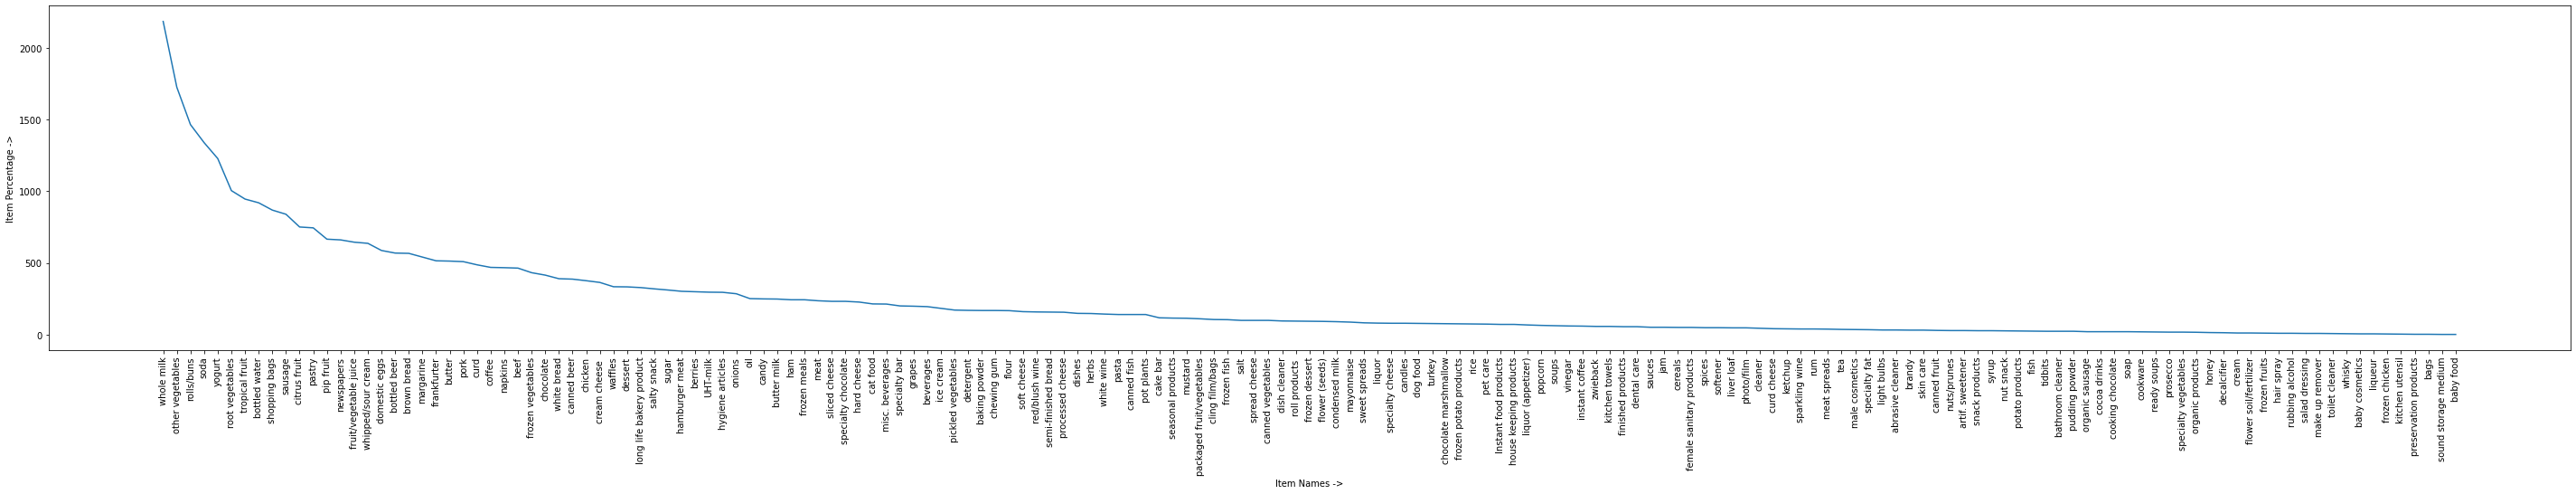

In [48]:
plt.figure(figsize=[50,7])
plt.plot(final_market_df_without_null["item_name"],final_market_df_without_null["item_count"])
plt.ylabel("Item Percentage ->")
plt.xlabel("Item Names ->")
plt.xticks(rotation = 90)
plt.show()

#### This looks perfect; now we have our filtered dataset, now its time to actually apply the Market Basket Analysis but for that we 

#### need to create association rules, so let's do that

#### we would be using apriori library to generate those association rules, but caveat being :
- it can only process data in form of lists of lists and not pandas dataframe 

In [46]:
records = []
row = final_item_df.shape[0]
col = final_item_df.shape[1]
for i in range(0,row):
    records.append([str(final_item_df.values[i,j]) for j in range(0, col)])

#### Now we have out lists of lists so lets generate few association rules

In [47]:
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)
print(association_results)

[RelationRecord(items=frozenset({'hamburger meat', 'Instant food products'}), support=0.004973474801061008, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Instant food products'}), items_add=frozenset({'hamburger meat'}), confidence=0.4225352112676056, lift=8.43951123962317)]), RelationRecord(items=frozenset({'bottled beer', 'liquor'}), support=0.005802387267904509, ordered_statistics=[OrderedStatistic(items_base=frozenset({'liquor'}), items_add=frozenset({'bottled beer'}), confidence=0.4375, lift=4.637961335676626)]), RelationRecord(items=frozenset({'bottled beer', 'red/blush wine'}), support=0.007625994694960212, ordered_statistics=[OrderedStatistic(items_base=frozenset({'red/blush wine'}), items_add=frozenset({'bottled beer'}), confidence=0.2911392405063291, lift=3.086382950323686)]), RelationRecord(items=frozenset({'flour', 'sugar'}), support=0.007791777188328912, ordered_statistics=[OrderedStatistic(items_base=frozenset({'flour'}), items_add=frozenset({'sugar'}), conf

#### WOooohoo!! we have our association rules created but we have to make them presentable so we have to format the output. 

In [62]:
results = []
for item in association_results:
    pair = item[0]
    items = [x for x in pair]
    
    consequent = str(items[0])
    antecedent = str(items[1])
    support = str(int(float(str(item[1])[:7]) * 100000))
    confidence = str(item[2][0][2])[:7]
    lift = str(item[2][0][3])[:7]
    
    rows = (consequent,antecedent,support,confidence,lift)
    results.append(rows)
    
    final_result = pd.DataFrame(results,columns=['Consequent','Anticedent','Support','Confidence','Lift'])
    

#### Finally, let see how our association rules looks like

In [97]:
final_result = final_result.sort_values("Support",ascending=False,ignore_index=True)
final_result = final_result[(final_result["Consequent"] != 'nan') & (final_result["Anticedent"] != 'nan')].sort_values("Support",ignore_index=True)
display(final_result)
for i in range(final_result.shape[0]):
    print(f"Seems like people who are buying {final_result.Anticedent[i:i+1].values[0]} are more likely to buy {final_result.Consequent[i:i+1].values[0]}.")

,Consequent,Anticedent,Support,Confidence,Lift
0,whole milk,tropical fruit,464,0.37837,3.13083
1,butter,beef,464,0.50909,3.05555
2,root vegetables,beef,464,0.51851,3.11214
3,whole milk,beef,464,0.37837,3.13083
4,butter,beef,464,0.50909,3.05555
5,root vegetables,beef,464,0.51851,3.11214
6,pip fruit,tropical fruit,464,0.21052,3.65963
7,butter,yogurt,479,0.29896,4.27341
8,butter,tropical fruit,479,0.29896,4.27341
9,hamburger meat,Instant food products,496,0.42253,8.43951


Seems like people who are buying tropical fruit are more likely to buy whole milk.
Seems like people who are buying beef are more likely to buy butter.
Seems like people who are buying beef are more likely to buy root vegetables.
Seems like people who are buying beef are more likely to buy whole milk.
Seems like people who are buying beef are more likely to buy butter.
Seems like people who are buying beef are more likely to buy root vegetables.
Seems like people who are buying tropical fruit are more likely to buy pip fruit.
Seems like people who are buying yogurt are more likely to buy butter.
Seems like people who are buying tropical fruit are more likely to buy butter.
Seems like people who are buying Instant food products are more likely to buy hamburger meat.
Seems like people who are buying whole milk are more likely to buy butter.
Seems like people who are buying tropical fruit are more likely to buy whole milk.
Seems like people who are buying long life bakery product are more

### With the help of this association rules let's perform Market Basket Analysis
1. Seems like people who are buying whole milk are more likely to buy yogurt 
2. Seems like people who are buying whole milk are more likely to buy root vegetable
3. Seems like people who are buying white bread are more likely to buy ham 
4. Seems like people who are buying other vegetables are more likely to buy tropical fruits
5. Seems like people who are buying flour are more likely to buy sugar

### So Considering this top 5 Association Rules in mind we can :
- either put them together so that we can increase the sales of this shop 
- else we can also put them on the extreme points (only for those with highest confidence) ans put other things in between, to attract more shopping.

## Thank you 
*******************************************************************************************************************************